## Marketing Introduction
The Chartered Institute of Marketing (CIM)
Defines marketing as the management process responsible for identifying, anticipating, and satisfying customer requirements profitably

### Dataset Information 
- The data is related with direct **marketing campaigns of a Portuguese banking institution**. The marketing campaigns were based on **phone calls**. Often, more than one contact to the same client was required, in order to access if the **product (bank term deposit)** would be *yes* or not (*no* ) subscribed. 

### Marketing Campaign 
The 4Ps variable we have to consider;
-people,Place,Price and Promotion

###  What is a Term Deposit?

- Investing a certain amount for a predetermined period for a higher interest rate. The depositor agrees not to withdraw the amount before the fixed period. A higher interest rate is paid because of the restricted access to the amount in term deposits. A term deposit is, therefore, one of the safest investment options for risk-averse investors. The returns are guaranteed, and the investment is not subject to market fluctuations. term deposit can have a fixed or floating interest rate.
https://www.hdfclife.com/investment-plans/term-deposit


### Attributes Description


#### 1. Data Loading

In [26]:
# Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.figure_factory as ff
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.tree import DecisionTreeClassifier, plot_tree
from category_encoders import OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline


In [27]:
# pip install category_encoders


In [28]:
file_path = r'C:\Users\Admin\OneDrive\Documents\GitHub\ds_03\PRODIGY_DS_03\PRODIGY_DS_03\bank-full.csv'
df = pd.read_csv(file_path,delimiter=';')

# Display the first few rows of the DataFrame
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [29]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Renaming Column y

In [30]:
df.rename(columns={'y': 'deposit'}, inplace=True)
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

### Attributes Description: bank-additional-full
1.  **age:** numeric
2.  **job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.  **marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  **education:** (categorical: primary, secondary, tertiary and unknown)
5.  **default:** has credit in default? (categorical: 'no','yes','unknown')
6. **housing:** has housing loan? (categorical: 'no','yes','unknown')
7.  **loan:** has personal loan? (categorical: 'no','yes','unknown')
8.  **balance:** Balance of the individual.
9.  **contact:** contact communication type (categorical: 'cellular','telephone')
10. **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11.  **day:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12.  **duration:** last contact duration, in seconds (numeric)
13. **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted
15. **previous:** number of contacts performed before this campaign and for this client (numeric)
16. **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
17. **deposit** has the client subscribed a term deposit? (binary: 'yes','no')

### Data Cleaning 
- Attributes and values information

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- Fortunately, there are no missing values
- This will definitely make our job easir

### Exploring the Basics: Summary Statistics

In [32]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

####  Observation: Summary of Numerical Variables
- We have to total observations of 41188 entries of each attribute
  
     **Age:**
        The age of individuals in this dataset ranges from 17 to 98 years, with an average age of about 40 years.
        The spread (standard deviation) is around 10.4 years, indicating moderate variability in age.
        
    **Balance**- The age of individuals in this dataset ranges from -8019 to 102127, with an average age of about 1362.27.
        The spread (standard deviation) is around 13044.77, indicating high variability in age.

     **Duration:**
        This represents the duration of the last contact in seconds, ranging from 0 to 4918 seconds.
        The average call duration is about 258 seconds (~4.3 minutes), with a median of 180 seconds (~3 minutes), suggesting some calls are much longer than average.

    **Campaign:**
        This column shows the number of contacts performed during this campaign.
        The minimum is 1 contact, and the maximum is 56.
        The median value is 2, with most clients being contacted fewer than 3 times.

   **Pdays:**
        This shows the number of days since a client was last contacted, with a value of 999 indicating clients who weren’t previously contacted.
        A large number of records (median and 75th percentile at 999) suggest many clients had no prior contact.

   **Previous:**
        This shows the number of contacts with the client before the campaign.
        Most clients (75th percentile at 0) had no previous contact, although a few had up to 7 previous contacts.

Overall, the dataset seems to capture a variety of economic, demographic, and campaign-related variables that could influence a client’s likelihood to subscribe to a term deposit. Most clients in the dataset had limited previous contact, and economic indicators suggest a relatively stable but cautious economic environment.

## Numerical and Categorical variables Distribution  

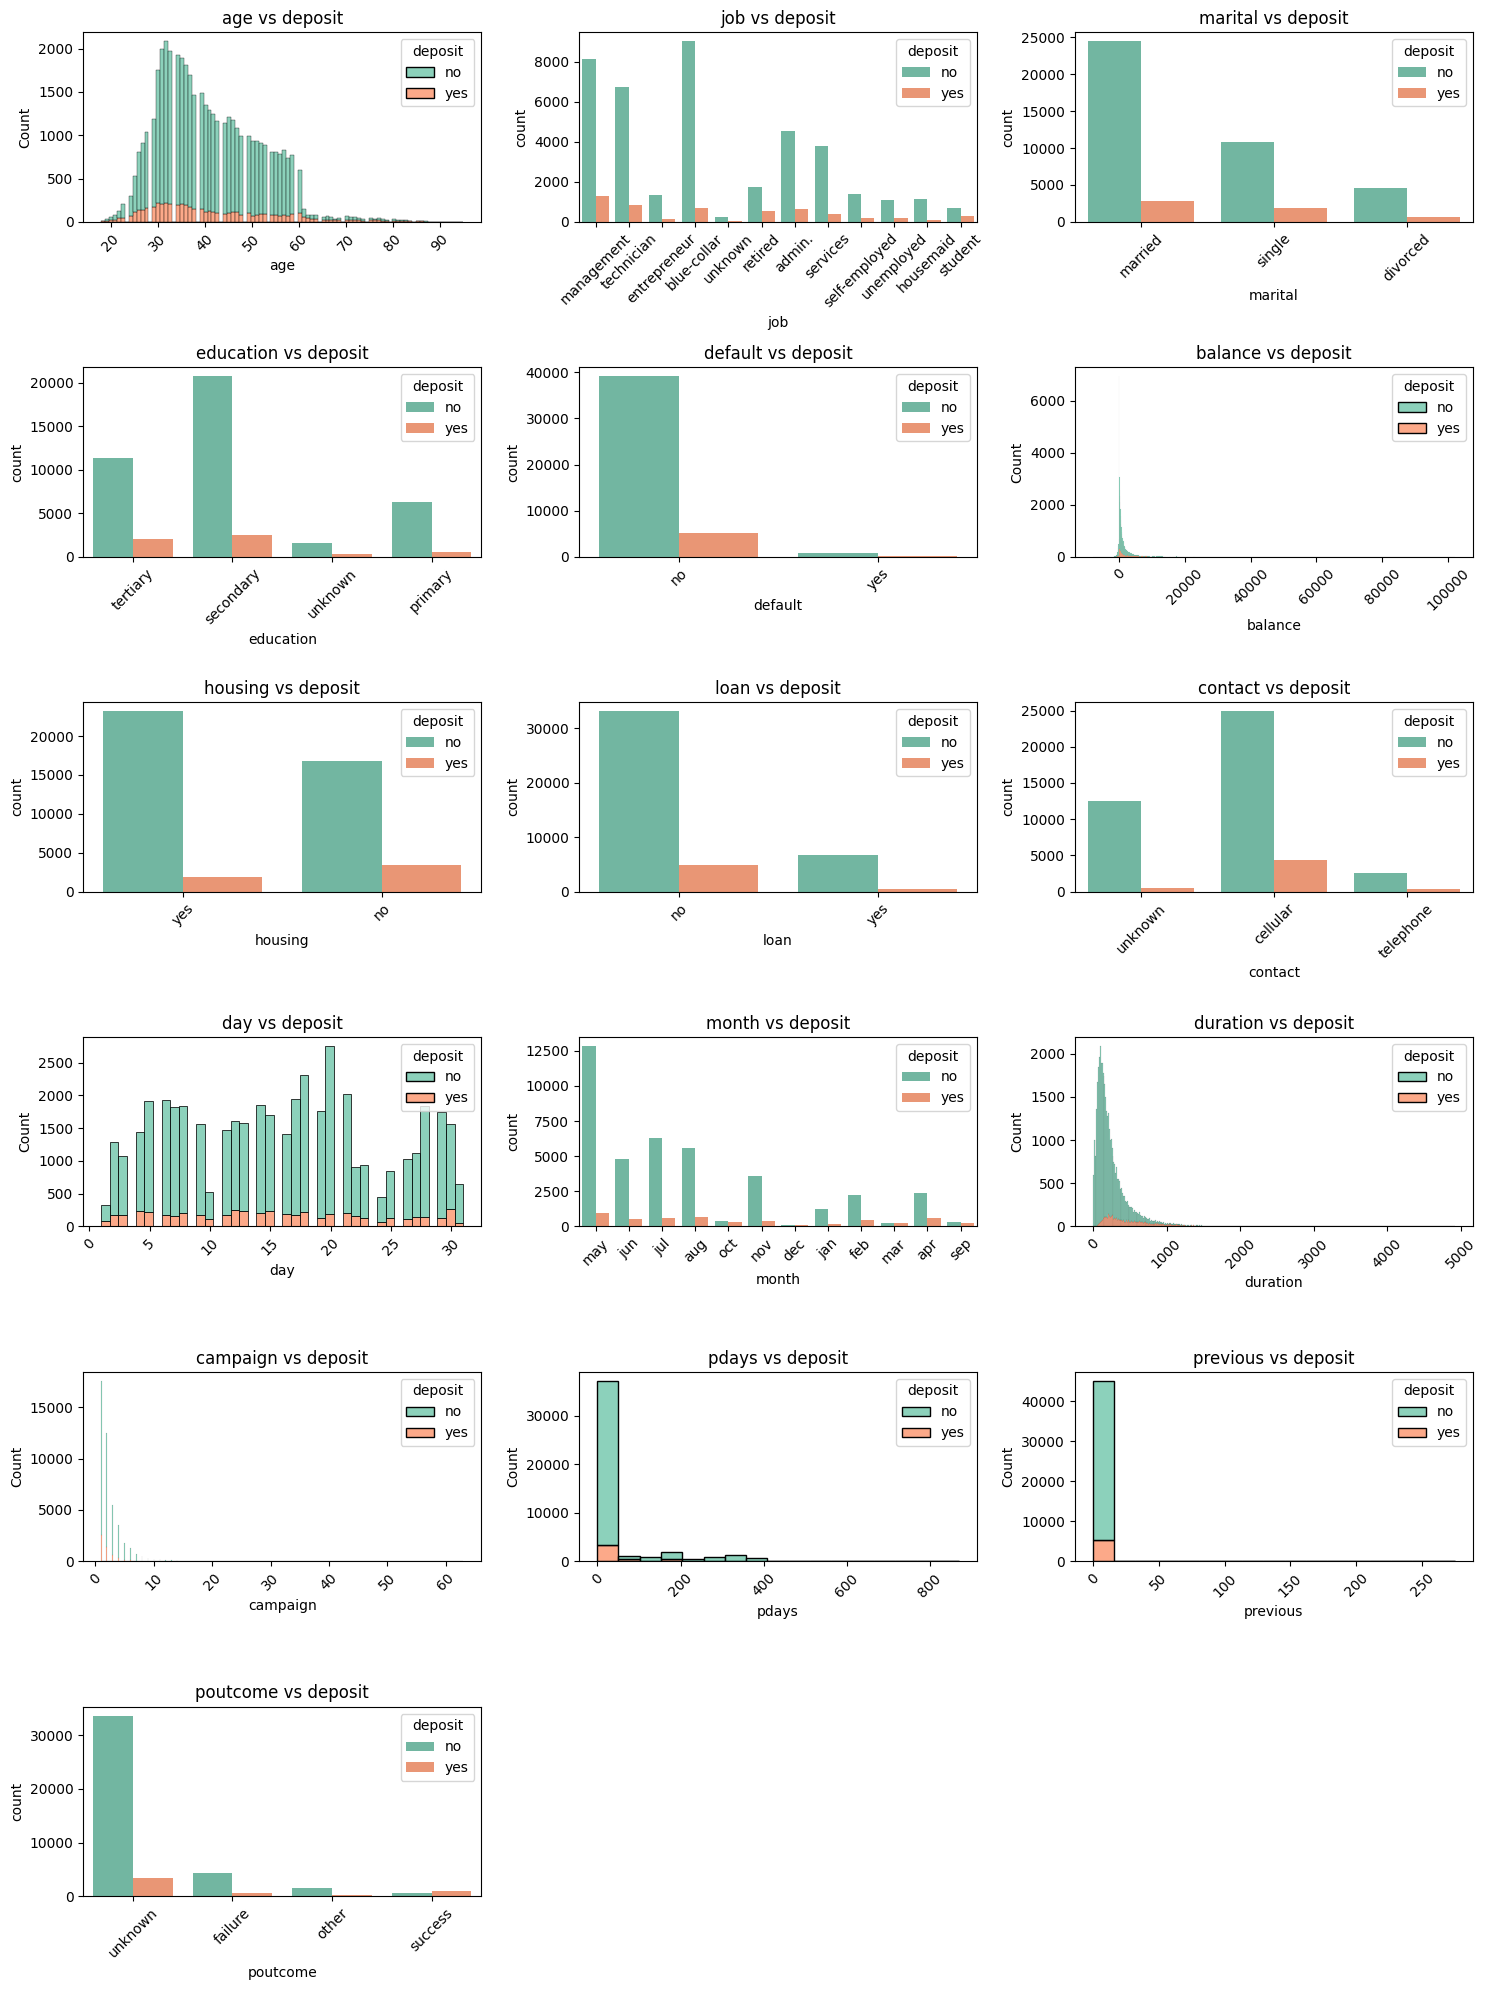

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 20))

# Define the color palette
palette = 'Set2'

# List of columns to plot against 'deposit'
columns_to_plot = df.columns.drop('deposit')

# Loop through each column and create a subplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(6, 3, i)  # Adjust grid layout if needed
    if df[column].dtype == 'object':  # Categorical data
        sns.countplot(x=column, hue='deposit', data=df, palette=palette)
    else:  # Numerical data
        # Ensure hue is specified in histplot and palette is applied correctly
        sns.histplot(data=df, x=column, hue='deposit', multiple="stack", palette=palette, kde=False)
    
    plt.title(f'{column} vs deposit')
    plt.xticks(rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


- **Deposit Subscription and Loans**: Clients without a personal or housing loan are more likely to subscribe to the deposit term compared to those with loans. This suggests that individuals free of other financial obligations may be more inclined or able to invest in deposit subscriptions.

- **Education Level and Subscription Rates:** Subscription rates are higher among clients with secondary and tertiary education levels than among those with only elementary education or an unknown education level. This may indicate that higher education levels correlate with greater financial awareness or ability to invest.

- **Continuous Attributes Insight:** Among the continuous attributes analyzed, duration stands out as a significant factor influencing deposit subscription rates. This attribute (likely representing the length of interaction during the campaign or call) shows a clear impact on whether clients subscribe, unlike other continuous variables where trends are less pronounced.
- **Occupation and Deposit Subscription:** Certain occupations show a higher tendency toward deposit term subscriptions. Specifically, managers, retired individuals, administrators, service workers, entrepreneurs, and students are more likely to subscribe. In contrast, other occupations demonstrate lower or minimal subscription rates. This pattern suggests that occupations associated with financial stability, savings capacity, or flexibility (such as students and retirees) may be more inclined to commit to deposit subscriptions.

C:\Users\Admin\AppData\Local\Temp\ipykernel_12020\2651023494.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




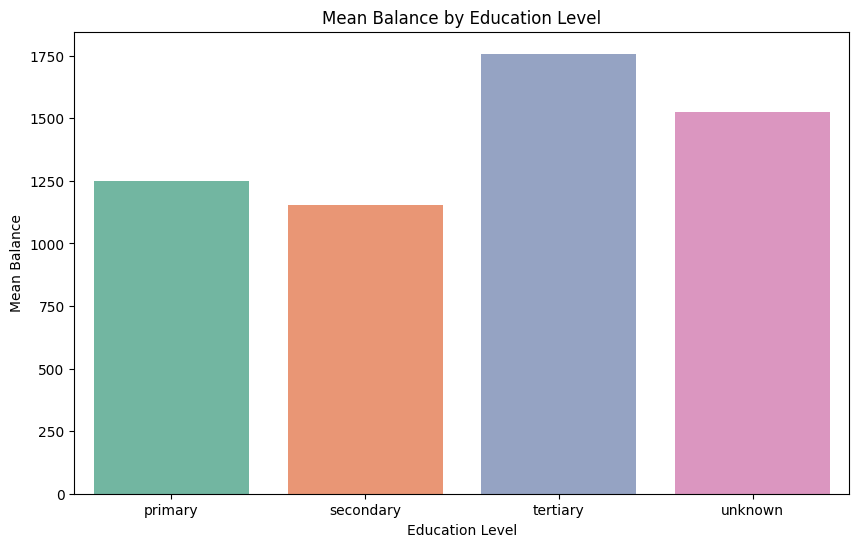

In [34]:
# Calculate the mean balance by education level
mean_balance_by_education = df.groupby('education')['balance'].mean().reset_index()

# Plot the mean balance by education level
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='balance', data=mean_balance_by_education, palette=palette)
plt.title('Mean Balance by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Balance')
plt.show()

- Customers with Tertiary has highest mean balance
- Customers Secondary level of education has the lowest mean balance
- This means that education attribute has a significant impact on the amount of balance

### Distribution of Age by Job


In [35]:
import plotly.express as px

# Box plot for Age by Job
fig_age = px.box(df, x='job', y='age', color='job', title='Box Plot of Age by Job')
fig_age.update_layout(xaxis_title='Job', yaxis_title='Age')

# Box plot for Balance by Job
fig_balance = px.box(df, x='job', y='balance', color='job', title='Box Plot of Balance by Job')
fig_balance.update_layout(xaxis_title='Job', yaxis_title='Balance')

# Show both plots
fig_age.show()
fig_balance.show()




**Number of Occupations**
  - Management is the occupation that is more prevalent in this dataset.
    Age by Occupation: As expected, the retired are the ones who have the highest median age while student are the lowest.
    Balance by Occupation: Management and Retirees are the ones who have the highest balance in their accounts

### Interpretation of Box Plot of Balance by Job

1. **Management and Retired Individuals**: These categories have the highest median balances, indicating that individuals in these professions tend to have higher account balances. This could be due to higher income levels or accumulated savings over time.

2. **Blue-Collar and Unemployed**: These categories have lower median balances, indicating that individuals in these professions tend to have lower account balances. This could be due to lower income levels or financial instability.

3. **Wide Range of Balances**: Some job categories, such as management and retired, show a wide range of balances, indicating significant variability in account balances within these professions.

4. **Outliers**: There are several outliers in the data, particularly in the management and retired categories, indicating that some individuals in these professions have exceptionally high balances.

Overall, the box plot provides a visual summary of the distribution of account balances across different job categories, highlighting the central tendency, variability, and presence of outliers in the data.

C:\Users\Admin\AppData\Local\Temp\ipykernel_12020\2857497118.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




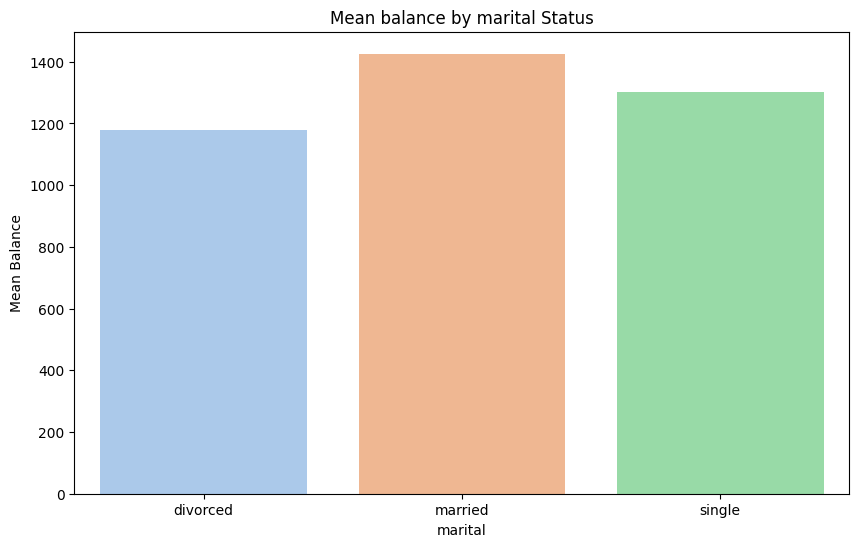

In [36]:
# Calculate the mean balance by education level
mean_balance_by_education = df.groupby('marital')['balance'].mean().reset_index()

# Plot the mean balance by education level
plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='balance', data=mean_balance_by_education, palette='pastel',legend=False)
plt.title('Mean balance by marital Status')
plt.xlabel('marital')
plt.ylabel('Mean Balance')
plt.show()
#sns.countplot(x='column_name', data=df, hue='column_name', palette='pastel', legend=False)


- Marital Status
Well in this analysis we didn't find any significant insights other than most divorced individuals are broke. No wonder since they have to split financial assets! Nevertheless, since no further insights have been found we will proceed to clustering marital status with education status. Let's see if we can find other groups of people in the sample population

### Clustering Marital Status and job 


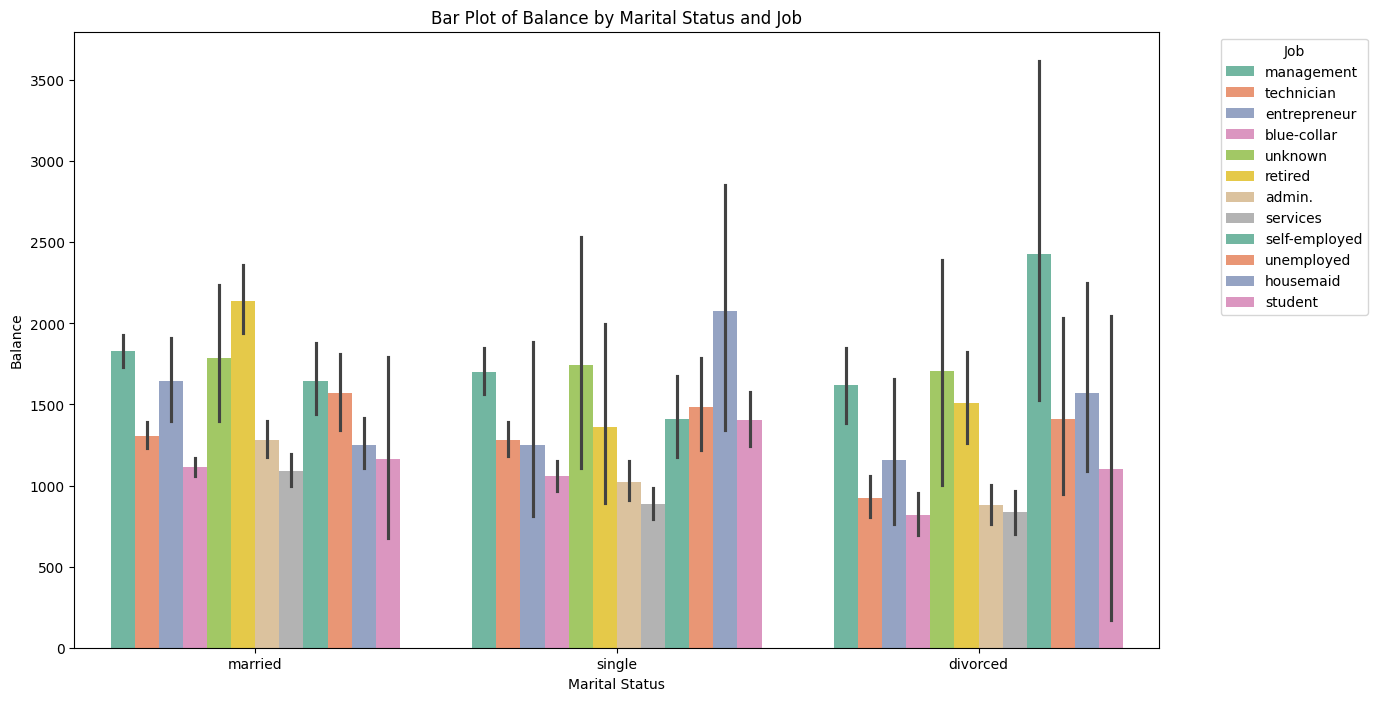

In [37]:
# Define a color palette (optional)
palette = 'Set2'  # Or define a custom palette as needed

plt.figure(figsize=(14, 8))  # Increase figure size for clarity
sns.barplot(x='marital', y='balance', hue='job', data=df, palette=palette)
plt.title('Bar Plot of Balance by Marital Status and Job')
plt.xlabel('Marital Status')
plt.ylabel('Balance')
plt.legend(title='Job', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


Here are the key insights from the bar plot of balance by marital status and job:

1. **Married Individuals**:
    - Married individuals generally have higher balances across most job categories.
    - Managers and retired individuals who are married have particularly high balances.

2. **Single Individuals**:
    - Single individuals have lower balances compared to married individuals.
    - However, single housemaids and retired individuals have relatively higher balances among single individuals.

3. **Divorced Individuals**:
    - Divorced individuals generally have the lowest balances across most job categories.
    - Divorced managers have the highest balances among divorced individuals.

4. **Job Categories**:
    - Managers and retired individuals tend to have higher balances regardless of marital status.
    - Housemaids and blue-collar workers tend to have lower balances across all marital statuses.

Overall, marital status and job category both significantly impact the balance, with married managers and retired individuals having the highest balances.

#### Key Observations
- From the above bar plot marital vs balance we have observed that the mean balance of married is greater than single followed by 
- Divorced managers have highest mean balance followed by single housemaid and then by retired married 
- 

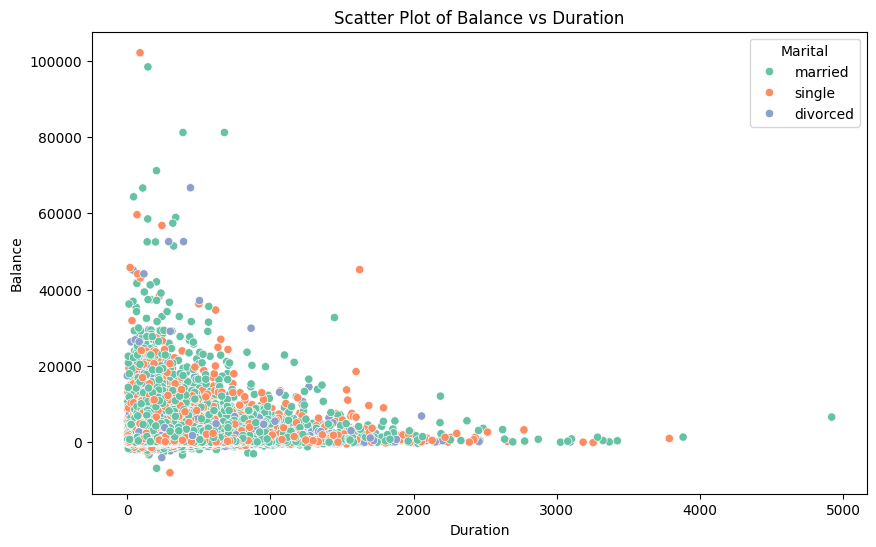

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='balance', data=df, hue='marital', palette=palette)
plt.title('Scatter Plot of Balance vs Duration')
plt.xlabel('Duration')
plt.ylabel('Balance')
plt.legend(title='Marital')
plt.show()

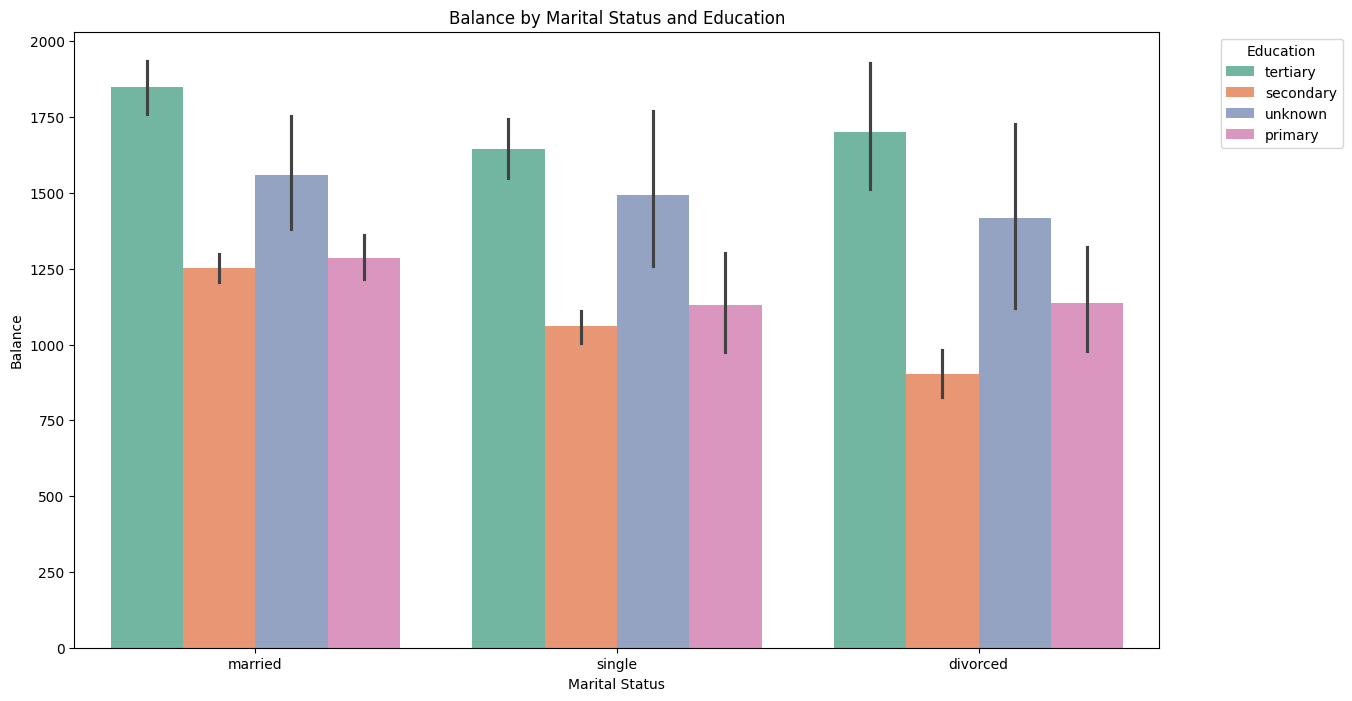

In [39]:
plt.figure(figsize=(14, 8))
sns.barplot(x='marital', y='balance', hue='education', data=df, palette=palette)
plt.title('Balance by Marital Status and Education')
plt.xlabel('Marital Status')
plt.ylabel('Balance')
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Key Observations 
- Across all marital statuses, individuals with tertiary education tend to have the highest average balance, while those with secondary education have the lowest.
- In particular, married customers with tertiary education show a notably high average balance.

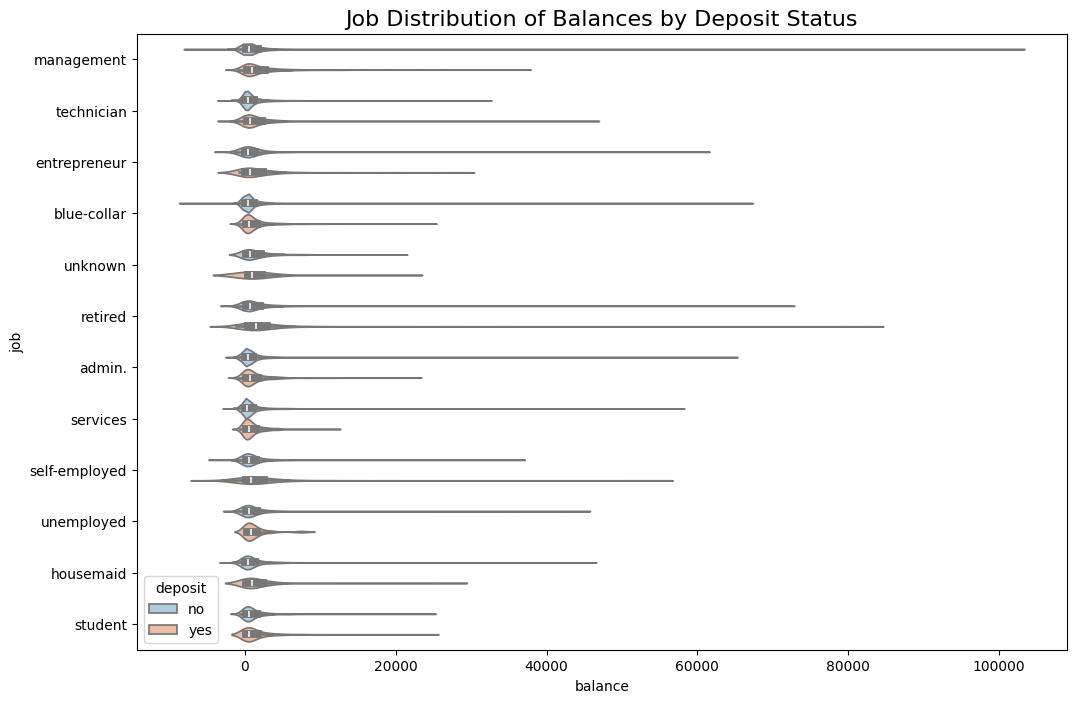

In [40]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="deposit", palette="RdBu_r",
            data=df);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

### Observations:
1. **Retired Individuals**: As expected, the retired category has the highest median age.
2. **Students**: The student category has the lowest median age.
3. **Management and Technicians**: These categories have a relatively wide age range, indicating a diverse age group within these professions.
4. **Management and Retired Individuals**: These categories have the highest median balance, indicating that individuals in these professions tend to have higher account balances.
5. **Blue-Collar and Unemployed**: These categories have lower median balances, indicating that individuals in these professions tend to have lower account balances.

Overall, the box plots provide a visual summary of the distribution of age and balance across different job categories, highlighting the central tendency, variability, and presence of outliers in the data.

<Figure size 1200x800 with 0 Axes>

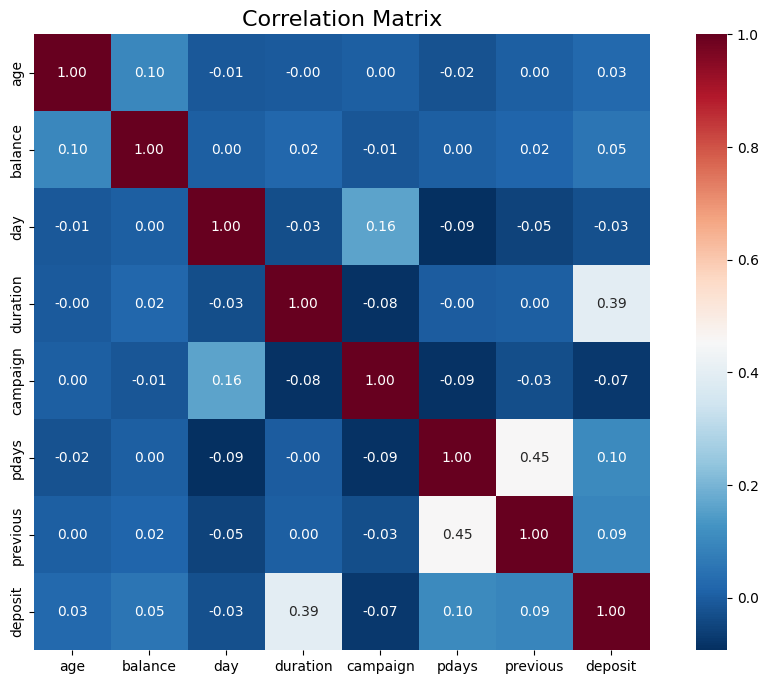

In [41]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])

# Separate numeric columns
numeric_df = df.select_dtypes(exclude="object")

# Calculate correlation matrix
corr_numeric = numeric_df.corr()

# Plot heatmap with annotations for correlation coefficients
fig = plt.figure(figsize=(12, 8))
sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r", annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

#### Correlation Matrix Analysis

The correlation matrix provides insights into the relationships between various variables in the dataset. Here are some key points:Duration: Strong positive correlation with deposit (0.39), indicating that longer call durations are associated with a higher likelihood of deposit subscription.

**Pdays**: Positively correlated with previous (0.45), suggesting that clients contacted after a longer period are more likely to have had previous contacts.

**Age:** Positively correlated with balance (0.10), indicating a slight tendency for older individuals to have higher balances. It has a weak positive correlation with deposit (0.03), suggesting a minor tendency for older individuals to subscribe to term deposits.

**Balance:** Positively correlated with both age (0.10) and deposit (0.05), indicating that individuals with higher balances are slightly more inclined to subscribe to term deposits.

**Day:** Negatively correlated with duration (-0.03) and deposit (-0.03), indicating that the day of the month has minimal influence on call duration or deposit subscription.

**Campaign:** Positively correlated with day (0.16) and negatively correlated with deposit (-0.07), suggesting that more campaign contacts are associated with 
a slightly lower likelihood of deposit subscription.

**Previous:** Positively correlated with both pdays (0.45) and deposit (0.09), suggesting that clients with more previous contacts are slightly more likely to subscribe to a term deposit.

**Summary**

Overall, the matrix highlights that duration has the strongest positive correlation with deposit, making it a key indicator for predicting deposit subscriptions. Other variables such as balance, pdays, and previous also show positive correlations with deposit but to a lesser extent.###

### The impact of Duration: Below and Above Average

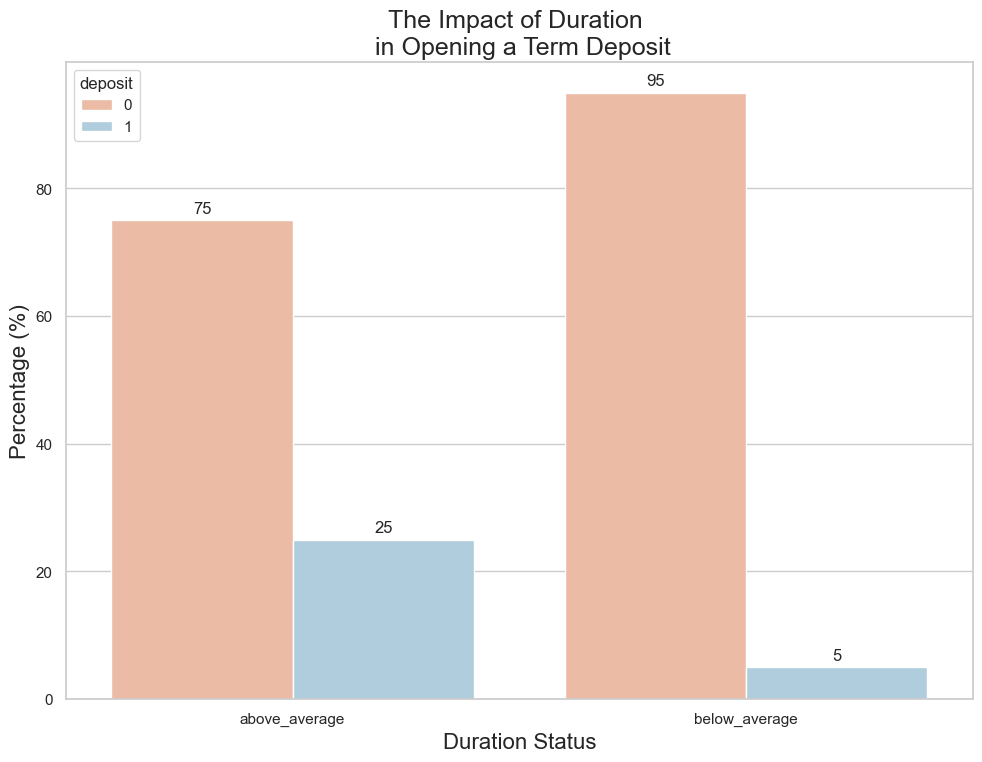

In [42]:

# Set plot style and size
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set_style('whitegrid')

# Calculate average duration and create a new column for duration status
avg_duration = df['duration'].mean()
df["duration_status"] = np.where(df["duration"] < avg_duration, "below_average", "above_average")

# Create a percentage crosstab of duration_status vs y
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r / r.sum(), 2) * 100, axis=1).reset_index()

# Melt data for seaborn barplot
pct_term_melted = pct_term.melt(id_vars="duration_status", var_name="deposit", value_name="percentage")

# Plotting with seaborn barplot
plt.figure(figsize=(11.7, 8.27))
ax = sns.barplot(x="duration_status", y="percentage", hue="deposit", data=pct_term_melted, palette='RdBu')

# Customize title and labels
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=16)

# Annotate each bar with its height
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type="edge", padding=3)

plt.legend(title="deposit", loc="upper left")
plt.show()


Here are the key observations from the plot:

1. **Above Average Duration**:
    - 25% of clients with above-average duration calls opened a term deposit.
    - 75% of clients with above-average duration calls did not open a term deposit.

2. **Below Average Duration**:
    - Only 5% of clients with below-average duration calls opened a term deposit.
    - 95% of clients with below-average duration calls did not open a term deposit.

**Interpretation**:
- The duration of the call has a significant impact on the likelihood of a client opening a term deposit.
- Clients who had longer calls (above average duration) are more likely to open a term deposit compared to those with shorter calls (below average duration).
- **This suggests that longer interactions with clients may provide more opportunities to explain the benefits and details of the term deposit, thereby increasing the chances of subscription**.

### Data Split

## Split

In [43]:
# Define the target column
target = "deposit"
features = df.drop(columns=[target]).columns
X = df[features]
y = df[target]

In [44]:
print(X.shape)
print(y.shape)

(45211, 17)
(45211,)


### Divide your data (X and y) into training and test sets 
- using a randomized train-test split. Your test set should be 20% of your total data. And don't forget to set a random_state for reproducibility. 

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state=42) # Test size =0.2(len(df)) and 80% is for training the model.

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2 ,random_state=42) 

## Build the Model

##### Base Line Model

In [47]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.88


#### Iterate

In [48]:
# Build Model
model = make_pipeline(OrdinalEncoder(),DecisionTreeClassifier(random_state=42))
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'poutcome', 'duration_status'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': management        1
retired           2
admin.            3
blue-collar       4
services          5
technician        6
entrepreneur      7
self-employed     8
unemployed        9
housemaid        10
student          11
unknown          12
NaN              -2
dtype: i...
                                          'mapping': nov     1
aug     2
may     3
apr     4
sep     5
jun     6
feb     7
jul     8
jan     9
oct    10
mar    11
dec    12
NaN    -2
dtype: int64},
                                         {'col': 'poutcome',
                                          'data_type': dtype('O'),
                                          'mapping': unknown    1
failure    2
other      3
success    4
NaN       -2
dtype: int64},
                                         {'col': 'duration_status',
                                          'data_type': dtype('O'),
                                          'mapping': above_average    1
below_average    2
NaN             -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [49]:
from sklearn.metrics import accuracy_score
y_predict=model.predict(X_train)
acc_train = accuracy_score(y_train,y_predict)  
acc_val = model.score(X_val,y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 1.0
Validation Accuracy: 0.87


##### Use the get_depth method on the DecisionTreeClassifier in your model to see how deep your tree grew during training. 

In [50]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth() 
print("Tree Depth:", tree_depth)

Tree Depth: 29


### Hyperparameter: Tunning  

In [60]:
depth_hyperparams = range(1,30,2)
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model pipeline with specified depth
    test_model = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    
    # Fit model to training data
    test_model.fit(X_train, y_train)
    
    # Calculate and store training accuracy
    training_acc.append(accuracy_score(y_train, test_model.predict(X_train)))
    
    # Calculate and store validation accuracy
    validation_acc.append(test_model.score(X_val, y_val))

# Display the first three scores as an example
print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.8843575032833345, 0.9027787378171009, 0.9059238266399392]
Validation Accuracy Scores: [0.8822228366049212, 0.9015758916228919, 0.9036494332319602]


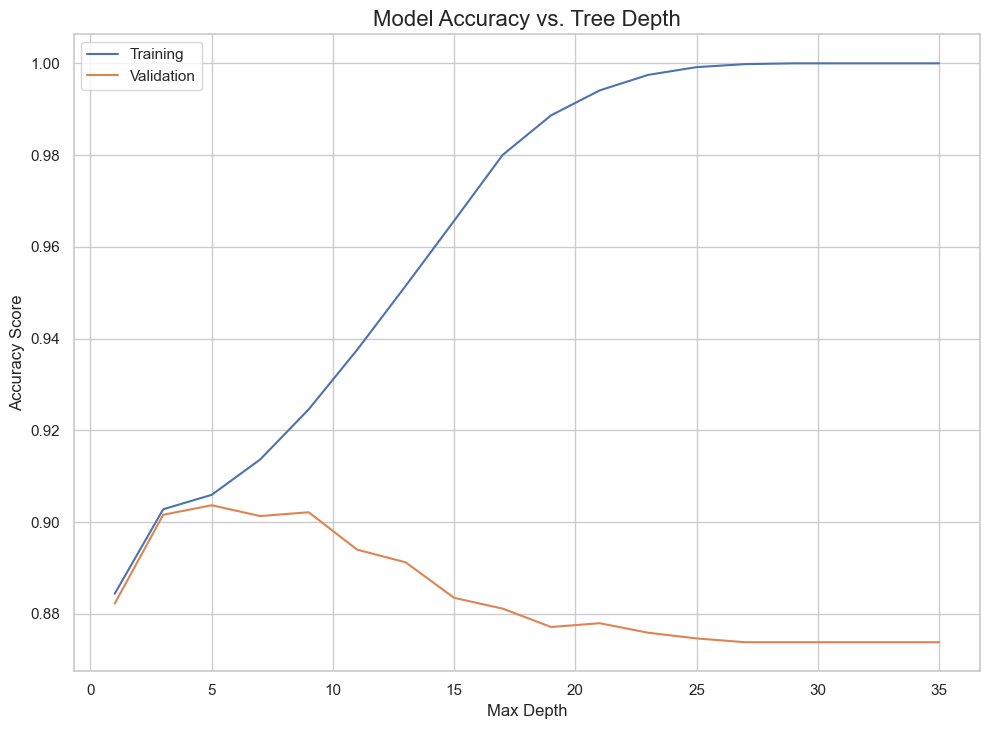

In [53]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label="Training")
plt.plot(depth_hyperparams, validation_acc, label="Validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")  # Changed 'y.label' to 'plt.ylabel'
plt.legend()  # Changed 'plt.label()' to 'plt.legend()'
plt.title("Model Accuracy vs. Tree Depth", fontsize=16)
plt.show()

### Evaluate

In [54]:
# Build Model
model = make_pipeline(OrdinalEncoder(),DecisionTreeClassifier(max_depth=3,random_state=42))
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'poutcome', 'duration_status'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': management        1
retired           2
admin.            3
blue-collar       4
services          5
technician        6
entrepreneur      7
self-employed     8
unemployed        9
housemaid        10
student          11
unknown          12
NaN              -2
dtype: i...
aug     2
may     3
apr     4
sep     5
jun     6
feb     7
jul     8
jan     9
oct    10
mar    11
dec    12
NaN    -2
dtype: int64},
                                         {'col': 'poutcome',
                                          'data_type': dtype('O'),
                                          'mapping': unknown    1
failure    2
other      3
success    4
NaN       -2
dtype: int64},
                                         {'col': 'duration_status',
                                          'data_type': dtype('O'),
                                          'mapping': above_average    1
below_average    2
NaN             -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [55]:
y_predict=model.predict(X_train)
acc_train = accuracy_score(y_train,y_predict)  # acc_train = accuracy_score(y_train,model.predict(X_tarin))
acc_val = model.score(X_val,y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.9
Validation Accuracy: 0.9


## Communication

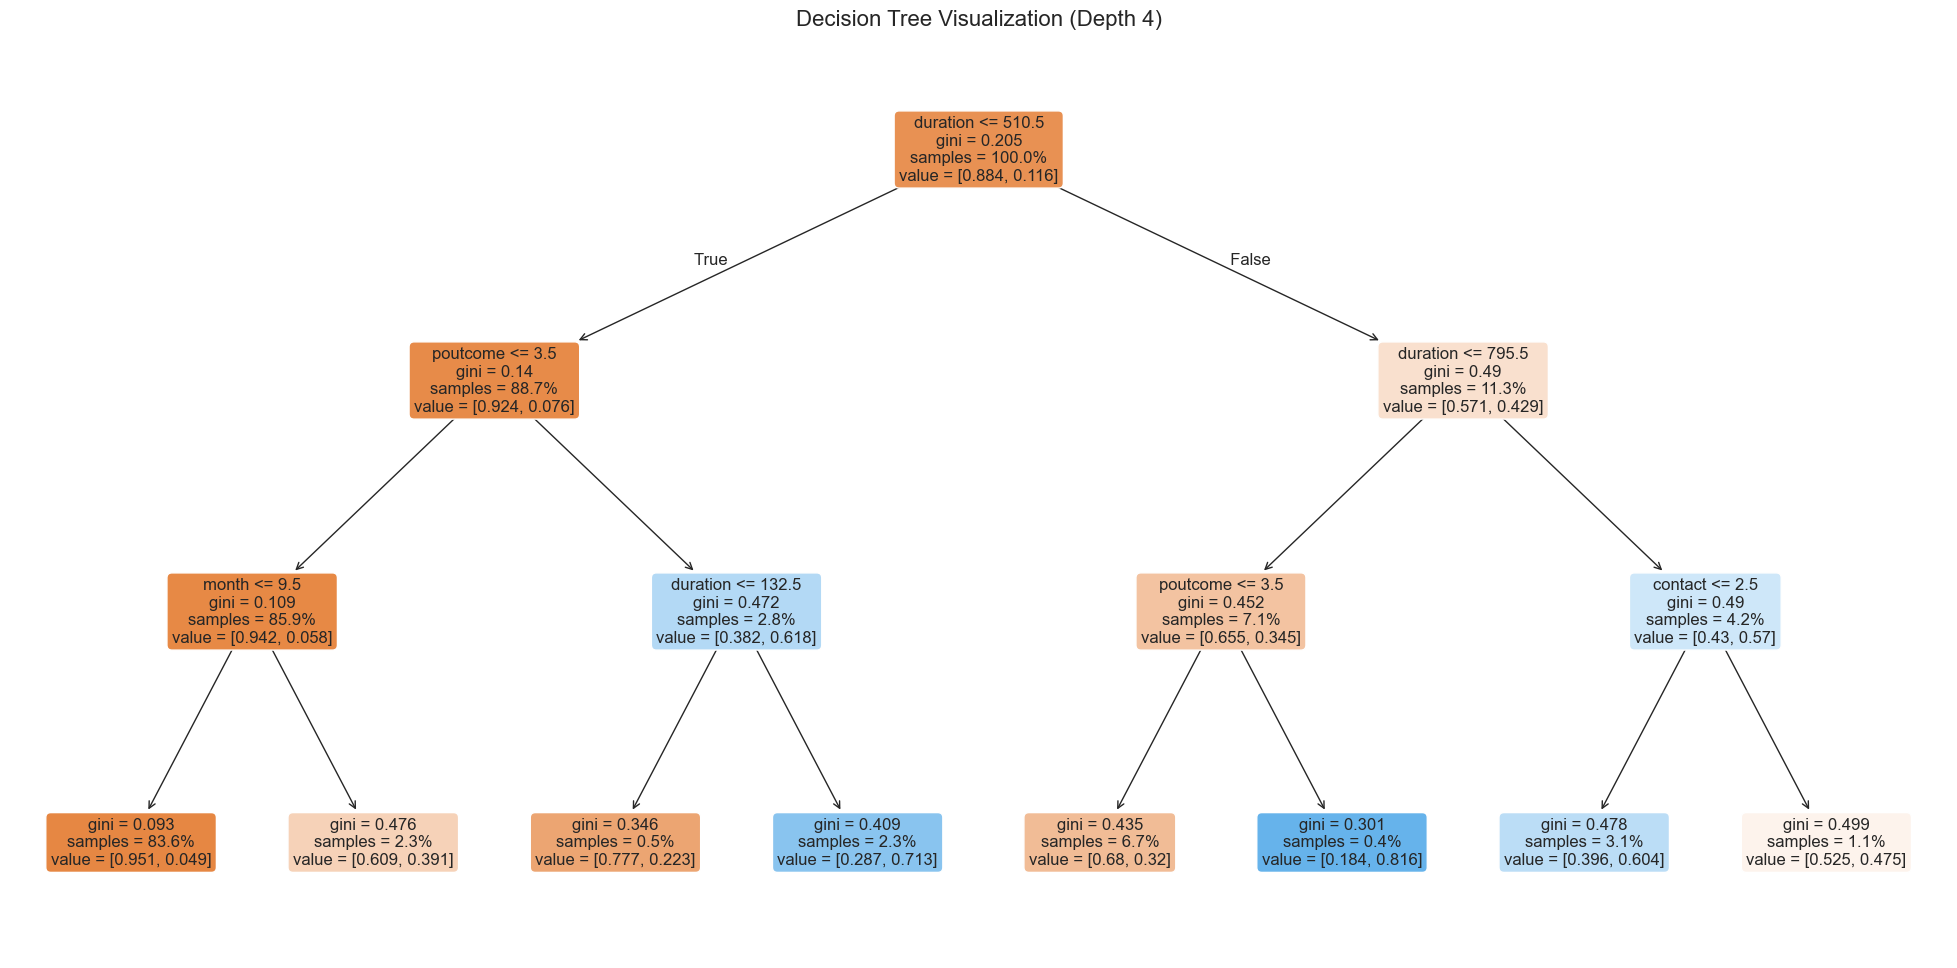

In [61]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))

# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns.to_list(),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=4,  # Only display first 4 levels
    fontsize=12,  # Enlarge font
    ax=ax  # Place in figure axis
)

# Set the title for the plot
ax.set_title("Decision Tree Visualization (Depth 4)", fontsize=16)

plt.show()


A tree diagram of the Decision Tree Classifier. Here is an interpretation of the plot:

1. **Root Node**: The root node represents the entire dataset. It is split based on the feature that provides the best separation between the classes (in this case, whether a client subscribes to a term deposit or not).

2. **Internal Nodes**: Each internal node represents a decision based on a feature. The decision splits the data into two branches, one for each possible outcome of the decision.

3. **Leaf Nodes**: The leaf nodes represent the final decision or classification. Each leaf node shows the proportion of samples in each class (yes or no for term deposit subscription).

4. **Feature Importance**: The features used at the top levels of the tree are generally more important for making predictions. For example, if the `duration` feature is used at the root node, it indicates that the duration of the call is a significant factor in determining whether a client will subscribe to a term deposit.

5. **Class Proportions**: The color of the nodes indicates the proportion of samples in each class. A node with a higher proportion of one class will be colored more intensely.

6. **Depth of the Tree**: The depth of the tree indicates the complexity of the model. A deeper tree can capture more intricate patterns in the data but may also be prone to overfitting.

Overall, the tree diagram provides a visual representation of how the Decision Tree Classifier makes decisions based on the features in the dataset. It helps to understand the importance of different features and the decision-making process of the model.

In [57]:
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['age', 'job', 'marital'], dtype='object')
Importances: [0. 0. 0.]


In [58]:
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp


duration           0.551558
poutcome           0.347596
month              0.095795
contact            0.005051
day                0.000000
previous           0.000000
pdays              0.000000
campaign           0.000000
age                0.000000
job                0.000000
loan               0.000000
housing            0.000000
balance            0.000000
default            0.000000
education          0.000000
marital            0.000000
duration_status    0.000000
dtype: float64

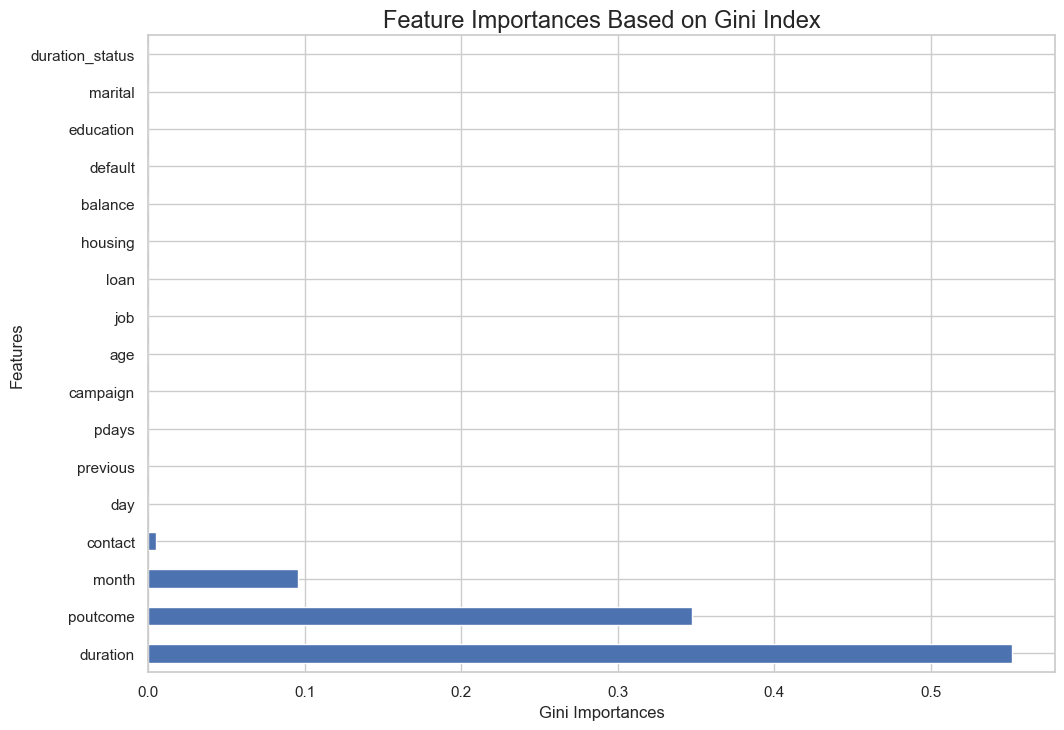

In [59]:
# Create horizontal bar chart
feat_imp.sum()
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importances")
plt.ylabel("Features")
plt.title("Feature Importances Based on Gini Index", fontsize=17)
plt.show()

- The output shows the feature importances for a machine learning model, where feat_imp is a sorted pandas Series representing how much each feature (variable) contributes to the predictions made by the model. In this context:

    Higher values indicate more importance: Features with higher importance values are more influential in making accurate predictions.
    Lower values indicate less importance: Features with a value of 0.000000 contribute minimally or not at all to the model, suggesting they may be less relevant or even redundant for prediction purposes.

Here’s an interpretation of some of these feature importances:

    - duration (0.541821) and poutcome (0.294821) have the highest importance, meaning they are the most influential features for the model's predictions.
    - Features like duration_status, job, marital, and others with an importance of 0.000000 contribute very little and might be considered for removal if you're looking to simplify the model.
    - Mid-level features like month, contact, and age have moderate importance, so they play some role but not as much as the top features.

#### Campaign Conclusion and Recommendations

Primary Target - Duration and Interaction Focus:

    Call duration and previous campaign outcomes are strong indicators of deposit success, so prioritize outreach to individuals who respond positively to longer engagements. These interactions are likely to lead to successful deposit subscriptions.

Target Demographics for Higher Deposit Potential:

    Married Managers and Retirees: These groups consistently have higher balances, making them ideal candidates for deposit-focused campaigns.
    Single Retirees and Housemaids: Among single individuals, retirees and housemaids have relatively higher balances, indicating potential for deposits within these groups as well.
    Divorced Managers: Although balances are generally lower among divorced individuals, divorced managers stand out with higher balances, suggesting they may also be worthwhile prospects.

Job Category Targeting:

    Managers and Retirees across all marital statuses generally maintain high balances, making them key targets for campaigns aimed at higher deposit values.
    Housemaids and Blue-Collar Workers generally have lower balances, so campaign resources may be better allocated toward other demographics unless these groups are identified as responsive to longer interactions.

Strategic Recommendations:

    Longer Call Durations: Tailor interactions to build rapport and discuss the benefits of deposit products in detail, particularly with high-balance individuals.
    Personalized Messaging: Focus messaging on financial growth and security to appeal to job categories and marital statuses with higher balance potential.
    Selective Outreach: Minimize outreach to demographics less likely to engage in term deposits based on their balance patterns and responsiveness to prior campaigns.

By concentrating on individuals with high balance potential and maximizing engagement duration, the campaign can align more effectively with the bank’s goals of increasing deposits.
